In [1]:
### reading sample audio using Librosa

import librosa
audio_file_path='E:\\Users\\Sumit\\Downloads\\UrbanSound8K\\UrbanSound8K\\drilling.wav'
librosa_audio_data, librosa_sample_rate = librosa.load(audio_file_path)

In [2]:
print(librosa_audio_data)

###by default librosa converts all the audio data into one dimensional signal i.e. monochannel

[-0.02224744 -0.04118708 -0.09173631 ... -0.00949634 -0.03796545
 -0.07508254]


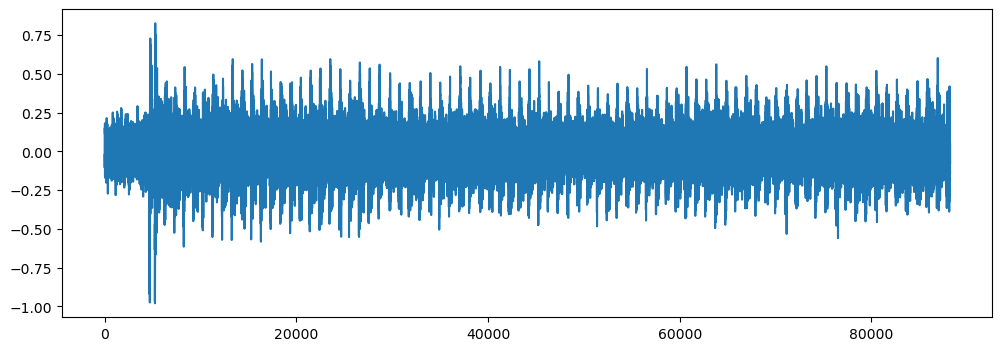

In [3]:
### Plot the Librosa audio data

import matplotlib.pyplot as plt
# Original audio with only one channel

plt.figure(figsize=(12,4))
plt.plot(librosa_audio_data)

In [4]:
### reading a sample audio using Scipy

from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [5]:
wave_audio

array([[-1953,   -79],
       [ -659, -1428],
       [  250, -2530],
       ...,
       [  293, -5746],
       [-2273, -3817],
       [-2795,  1451]], dtype=int16)

In [6]:
### hence here we can observe two features this is 2 dimensional i.e. stereo

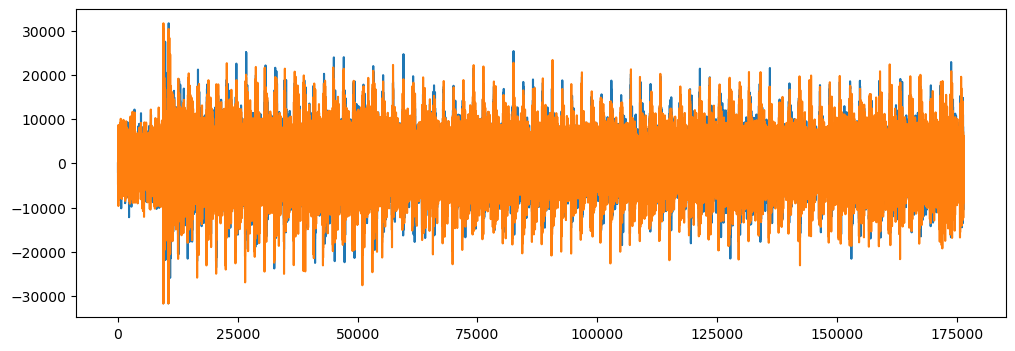

In [7]:
import matplotlib.pyplot as plt

#original audio with 2 channel (stereo channel)
plt.figure(figsize=(12,4))
plt.plot(wave_audio)

In [8]:
### Extracting MFCC's for every audio file

import pandas as pd
import os
import librosa

audio_dataset_path='E:\\Users\\Sumit\\Downloads\\UrbanSound8K\\UrbanSound8K\\audio\\'
metadata = pd.read_csv('E:\\Users\\Sumit\\Downloads\\UrbanSound8K\\UrbanSound8K\\metadata\\UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [9]:
### Feature Extraction from the audio file

def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features

In [10]:
pip install resampy

Note: you may need to restart the kernel to use updated packages.


In [11]:
import resampy
import numpy as np
from tqdm import tqdm

###We iterate through every audio file and extract features using Mel-Frequency Cepstral Coefficients

extracted_features = []
for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels = row["class"]
    data = features_extractor(file_name)
    extracted_features.append([data,final_class_labels])
    
        

3555it [04:20, 13.89it/s]C:\Users\sumit\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8326it [10:12, 20.92it/s]C:\Users\sumit\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\Users\sumit\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [10:43, 13.57it/s]


In [12]:
### converting extracted features to Pandas dataframe

extracted_features_df = pd.DataFrame(extracted_features, columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036354, ...",children_playing
4,"[-446.60352, 113.68541, -52.402218, 60.302044,...",children_playing


In [93]:
### split the dataset into independent and dependent datasets
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [95]:
X.shape

(8732, 40)

In [97]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [99]:
##Label encoding

#y = np.array(pd.get_dummies(Y))

###LABEL ENCODER

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(y))

In [101]:
y.shape

(8732, 10)

In [103]:
### Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42)


In [105]:
#represent the independent features
X_train

array([[-8.80240936e+01,  1.15684669e+02, -9.68509445e+01, ...,
         2.10284591e+00,  5.68624258e+00, -4.03489542e+00],
       [-1.62190353e+02,  1.33891235e+02, -2.55662365e+01, ...,
        -3.12729955e+00, -4.14286900e+00,  9.90924895e-01],
       [-2.62374603e+02,  1.76690979e+02, -1.12590805e+02, ...,
         3.60265344e-01,  2.11163545e+00, -1.68925834e+00],
       ...,
       [-2.91092590e+02,  2.33220108e+02, -4.70138979e+00, ...,
         2.92341739e-01, -3.27010900e-01, -5.25229797e-02],
       [-2.00923096e+02,  9.21831055e+01, -7.96089706e+01, ...,
        -5.86358070e-01, -1.96598291e+00,  4.89708471e+00],
       [-2.70923035e+02,  1.34519638e+02, -7.87687111e+00, ...,
        -1.71547735e+00, -1.77560544e+00, -2.85965413e-01]], dtype=float32)

In [107]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [109]:
X_train.shape

(6985, 40)

In [111]:
X_test.shape

(1747, 40)

In [113]:
y_train.shape

(6985, 10)

In [115]:
y_test.shape

(1747, 10)

In [119]:
#MODEL CREATION

In [123]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [124]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [127]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Input
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [129]:
### Number of classes
num_labels = y.shape[1]

In [131]:
model = Sequential()

model.add(Input(shape=(40,)))

model.compile(optimizer='adam',              # Optimizer
              loss='binary_crossentropy',    # Loss function
              metrics=['accuracy'])   

##First layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

##Second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

##Third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

##Final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [133]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 100)            │         4,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,410 (177.38 KB)

 Trainable params: 45,410 (177.38 KB)

 Non-trainable params: 0 (0.00 B)

In [135]:
###TRAINING MY MODEL

import numpy as np
import h5py
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='E:\\Users\\Sumit\Downloads\\UrbanSound8K\\UrbanSound8K\\saved_models\\audio_classification.keras',
                               verbose = 1, save_best_only = True)
start = datetime.now()

model.fit(X_train, y_train, batch_size = num_batch_size, epochs = num_epochs, validation_data = (X_test, y_test), callbacks = [checkpointer])

duration = datetime.now() - start
print("Training completed in time: ", duration)  

Epoch 1/100


<>:11: SyntaxWarning: invalid escape sequence '\D'
<>:11: SyntaxWarning: invalid escape sequence '\D'
C:\Users\sumit\AppData\Local\Temp\ipykernel_22936\1401422753.py:11: SyntaxWarning: invalid escape sequence '\D'
  checkpointer = ModelCheckpoint(filepath='E:\\Users\\Sumit\Downloads\\UrbanSound8K\\UrbanSound8K\\saved_models\\audio_classification.keras',


174/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1063 - loss: 4.3127
Epoch 1: val_loss improved from inf to 0.48499, saving model to E:\Users\Sumit\Downloads\UrbanSound8K\UrbanSound8K\saved_models\audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1079 - loss: 3.8015 - val_accuracy: 0.1723 - val_loss: 0.4850
Epoch 2/100
182/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1296 - loss: 0.5212
Epoch 2: val_loss improved from 0.48499 to 0.40048, saving model to E:\Users\Sumit\Downloads\UrbanSound8K\UrbanSound8K\saved_models\audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1306 - loss: 0.5138 - val_accuracy: 0.2301 - val_loss: 0.4005
Epoch 3/100
185/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1627 - loss: 0.4015
Epoch 3: val_loss improved from 0.40048 to 0.35619, saving model to E:\Users\Sumit\Downloads\UrbanSound8K\UrbanSound8K\saved_models\audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - a

In [137]:
### TRAINING ACCURACY OBTAINED IS 68.69% AND VALIDATION ACCURACY = 78.71%
### RUNNING FOR ANOTHER 100 EPOCHS
### TRAINING ACCURACY OBTAINED IS 73.16% AND VALIDATION ACCURACY = 81.68%

In [139]:
test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(test_accuracy[1])

0.7773325443267822


In [141]:
prediction_feature.shape

(1, 40)

In [143]:
X_test[1]

array([-1.51822586e+01,  1.22926346e+02, -2.82493172e+01,  3.83861427e+01,
       -2.25571918e+01,  1.57255383e+01, -2.11664085e+01,  1.60669651e+01,
       -1.67626534e+01,  4.43442202e+00, -1.75691490e+01,  1.10780084e+00,
       -1.68248940e+01,  5.81197739e+00, -1.14360142e+01,  3.85555553e+00,
       -1.14742861e+01,  1.74410045e+00, -1.11911411e+01, -6.06604695e-01,
       -7.22439337e+00,  6.75586510e+00, -5.68317652e+00, -3.65150750e-01,
       -9.11909580e+00, -1.54882443e+00, -5.53272104e+00,  5.69772460e-02,
       -5.98371935e+00,  2.45258474e+00,  6.83671665e+00,  8.43443871e+00,
        5.96371591e-01,  4.53564316e-01, -2.25552940e+00, -3.11811686e+00,
       -5.68815470e+00,  7.58157253e-01,  1.85156882e+00, -4.57005322e-01],
      dtype=float32)

In [147]:
model.predict(X_test)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[1.7851911e-01, 2.5163900e-02, 6.5646648e-02, ..., 1.8635750e-01,
        1.7514229e-01, 1.2137187e-01],
       [1.1568088e-01, 2.6690884e-02, 1.2776685e-01, ..., 2.6452301e-02,
        2.0232866e-02, 3.9458799e-01],
       [3.2283586e-16, 9.3226893e-10, 6.4510525e-10, ..., 8.5820000e-09,
        8.7495115e-13, 4.5266227e-10],
       ...,
       [7.3899751e-06, 4.9569112e-06, 5.1382565e-05, ..., 8.1679974e-10,
        5.4708225e-06, 2.7179587e-04],
       [9.5605903e-04, 5.7313512e-03, 1.1029930e-02, ..., 2.9155141e-04,
        7.4730662e-04, 8.9669669e-01],
       [1.7489519e-09, 1.2781014e-06, 7.2943571e-05, ..., 9.2628697e-14,
        9.9923944e-01, 4.1000414e-05]], dtype=float32)

In [161]:
### showing test for any one of the audio file

filename='E:\\Users\\Sumit\\Downloads\\UrbanSound8K\\UrbanSound8K\\gun-shot.wav'
prediction_feature = features_extractor(filename)
prediction_feature = prediction_feature.reshape(1,-1)
predictions = model.predict(prediction_feature)

predicted_class = np.argmax(predictions, axis=1)

print(f"Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted class: [1]


In [151]:
metadata['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [ ]:
#TESTING SOME TEST AUDIO DATA

In [ ]:
#Steps
##Preprocess the new audio data
##predict the classes
##Inverse transform your predicted label

In [168]:
filename = 'E:\\Users\\Sumit\\Downloads\\UrbanSound8K\\UrbanSound8K\\gun-shot.mp3'
audio, sample_rate = librosa.load(filename, res_type = 'kaiser_fast')
mfccs_features = librosa.feature.mfcc(y = audio, sr = sample_rate, n_mfcc = 40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis = 0)

print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

predicted_probabilities = model.predict(mfccs_scaled_features)
predicted_label = np.argmax(predicted_probabilities, axis=1)  # Get the index of the class with the highest probability

print(predicted_label)

prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class

[-3.0040210e+02  1.7150534e+02 -3.3172066e+01  2.2112829e+01
  1.1509467e+01  1.2168238e+01 -1.5044307e+00  6.0944014e+00
 -5.5129070e-02  5.7760973e+00  1.1655995e+00  4.6987467e+00
 -6.4172918e-01  4.2339935e+00  3.0827143e+00  3.5580101e+00
 -1.6015790e+00  1.6072546e+00 -1.2695658e+00  1.5948045e+00
 -6.3692647e-01  1.3158751e+00 -3.1269237e-01 -1.7152080e-01
 -7.5867552e-01 -8.4470294e-02 -1.6544213e+00 -3.3129156e-01
 -1.4291719e-01  5.8416551e-01 -5.7885367e-01 -8.4043182e-02
  1.1027799e-01  8.8856137e-01  4.1652548e-01  5.2936560e-01
 -7.9415627e-02  1.0095581e+00  5.2262890e-01  1.6456102e-01]
[[-3.0040210e+02  1.7150534e+02 -3.3172066e+01  2.2112829e+01
   1.1509467e+01  1.2168238e+01 -1.5044307e+00  6.0944014e+00
  -5.5129070e-02  5.7760973e+00  1.1655995e+00  4.6987467e+00
  -6.4172918e-01  4.2339935e+00  3.0827143e+00  3.5580101e+00
  -1.6015790e+00  1.6072546e+00 -1.2695658e+00  1.5948045e+00
  -6.3692647e-01  1.3158751e+00 -3.1269237e-01 -1.7152080e-01
  -7.5867552e-01 

array(['air_conditioner'], dtype='<U16')